In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
from scipy.spatial import KDTree


In [3]:
# datalegend_path = '/home/mmint/Desktop/drawing_evaluation/drawing_evaluation_DataLegend.csv'
data_path = '/Users/mik/Desktop/bubble_files/drawing_evaluation'
datalegend_path = os.path.join(data_path, 'drawing_evaluation_DataLegend.csv')

df = pd.read_csv(datalegend_path)

df

,FileCode,SceneName,ControllerMethod,Score,NumSteps,NumStepsExpected
0,1,drawing_eval,bubble_dynamics_pretrained_autoencoder_model_mppi,14.372837,40,40
1,3,drawing_eval,bubble_dynamics_pretrained_autoencoder_model_mppi,17.519509,40,40
2,4,drawing_eval,bubble_dynamics_pretrained_autoencoder_model_mppi,54.709369,2,40
3,5,drawing_eval,bubble_dynamics_pretrained_autoencoder_model_mppi,127.498426,2,40
4,6,drawing_eval,bubble_dynamics_pretrained_autoencoder_model_mppi,37.048882,2,40
5,7,drawing_eval,bubble_dynamics_pretrained_autoencoder_model_mppi,12.967795,40,40
6,8,drawing_eval,bubble_dynamics_pretrained_autoencoder_model_mppi,124.141939,2,40
7,9,drawing_eval,bubble_dynamics_pretrained_autoencoder_model_mppi,17.194833,2,40
8,10,drawing_eval,bubble_dynamics_pretrained_autoencoder_model_mppi,50.230532,2,40
9,11,drawing_eval,bubble_dynamics_pretrained_autoencoder_model_mppi,95.998834,2,40


[Text(0, 0, 'Learned Model + MPPI'),
 Text(1, 0, 'Random Actions'),
 Text(2, 0, 'Fixed Model + MPPI')]

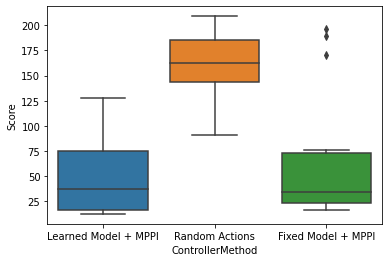

In [4]:
# ax = sns.boxplot(x='ControllerMethod', y='Score', data=df, whis=3.0)
ax = sns.boxplot(x='ControllerMethod', y='Score', data=df)
ax.set_xticklabels(['Learned Model + MPPI', 'Random Actions', 'Fixed Model + MPPI'])

In [5]:
model_names = np.unique(df.ControllerMethod)
model_names

array(['bubble_dynamics_fixed_model_mppi',
       'bubble_dynamics_pretrained_autoencoder_model_mppi',
       'random_action'], dtype=object)

In [6]:
model_names = np.unique(df.ControllerMethod)

results = []

for model_name in model_names:
    model = df[df.ControllerMethod == model_name]
    scores = model['Score'].values
#     scores = scores[np.where(scores<150)]
    mu = np.mean(scores)
    std = np.std(scores)
    max_score = np.max(scores)
    min_score = np.min(scores)
#     print('MU:', mu)
#     print('STD:', std)
    results.append([model_name, mu, std, max_score, min_score])
    
results_df = pd.DataFrame(results, columns=['ModelName', 'mu', 'std', 'max_score', 'min_score'])
results_df
    



,ModelName,mu,std,max_score,min_score
0,bubble_dynamics_fixed_model_mppi,68.173792,61.827212,196.082074,16.622580
1,bubble_dynamics_pretrained_autoencoder_model_mppi,52.013342,42.841856,127.498426,12.665338
2,random_action,157.585878,33.656675,208.987375,91.189445


In [7]:
scores_fixed_model = df[df.ControllerMethod == 'bubble_dynamics_fixed_model_mppi']
mu = np.mean(scores_fixed_model['Score'].values)
std = np.std(scores_fixed_model['Score'].values)
max_score = np.max(scores_learned_model['Score'].values)
min_score = np.max(scores_learned_model['Score'].values)
print('MU:', mu)
print('STD:', std)

NameError: name 'scores_learned_model' is not defined

In [8]:
scores_random = df[df.ControllerMethod == 'random_action']
mu = np.mean(scores_random['Score'].values)
std = np.std(scores_random['Score'].values)
max_score = np.max(scores_learned_model['Score'].values)
min_score = np.max(scores_learned_model['Score'].values)
print('MU:', mu)
print('STD:', std)

NameError: name 'scores_learned_model' is not defined

In [9]:
def load_drawing(fc):
    file_path = os.path.join(data_path, 'drawing_eval', 'measured_drawing', 'color_data', 'drawing_eval_color_{:06d}.npy'.format(fc))
    with open(file_path, 'rb') as f:
        drawing = np.load(f)
    return drawing
    
    
def load_desired_drawing(fc):
    file_path = os.path.join(data_path, 'drawing_eval', 'expected_drawing', 'color_data', 'drawing_eval_color_{:06d}.npy'.format(fc))
    with open(file_path, 'rb') as f:
        drawing = np.load(f)
    return drawing
    
    

In [10]:
def compute_score(actual_drawing, desired_drawing):
    img_th = 50
    current_drawing_pixels = np.stack(np.where(actual_drawing > img_th), axis=-1)
    desired_drawing_pixels = np.stack(np.where(desired_drawing > img_th), axis=-1)
    tree = KDTree(current_drawing_pixels)
    min_dists, min_indxs = tree.query(desired_drawing_pixels)
    score = np.mean(min_dists)
    return score

In [11]:
def compute_masked_score(actual_drawing, desired_drawing):
    actual_drawing_norm = np.divide(actual_drawing.astype(np.float32), actual_drawing.astype(np.float32), out=np.zeros_like(actual_drawing, dtype=np.float32), where=actual_drawing!=0)
    desired_drawing_norm = np.divide(desired_drawing.astype(np.float32), desired_drawing.astype(np.float32), out=np.zeros_like(desired_drawing, dtype=np.float32), where=desired_drawing!=0)
    score = np.sum(desired_drawing_norm * actual_drawing_norm)
    return score

In [12]:
add_new_cost_function(compute_masked_score, 'masked_score')

NameError: name 'add_new_cost_function' is not defined

In [49]:
def filter_img(img):
    tag_size = 150
    filtered_value = 0
    filtered_img = img.copy()
    filtered_img[:tag_size, :tag_size] = filtered_value
    filtered_img[:tag_size, -tag_size:] = filtered_value
    filtered_img[-tag_size:, :tag_size] = filtered_value
    filtered_img[-tag_size:, -tag_size:] = filtered_value
    return filtered_img

In [65]:
def add_new_cost_function(cost_function, name):
    new_scores = []
    for i, row_i in df.iterrows():
        fc = row_i['FileCode']
        drawn_img_i = load_drawing(fc)
        desired_img_i = load_desired_drawing(fc)
        filtered_img_i = filter_img(drawn_img_i)
        score_i = cost_function(filtered_img_i, desired_img_i)
        new_scores.append(score_i)
    df['{}_scores'.format(name)] = new_scores

[Text(0, 0, 'Learned Model + MPPI'),
 Text(1, 0, 'Random Actions'),
 Text(2, 0, 'Fixed Model + MPPI')]

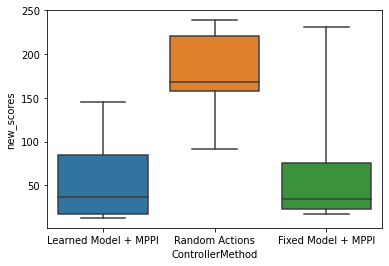

In [61]:
ax = sns.boxplot(x='ControllerMethod', y='new_scores', data=df, whis=3.0)
# ax = sns.boxplot(x='ControllerMethod', y='new_scores', data=df)
ax.set_xticklabels(['Learned Model + MPPI', 'Random Actions', 'Fixed Model + MPPI'])

[Text(0, 0, 'Learned Model + MPPI'), Text(1, 0, 'Fixed Model + MPPI')]

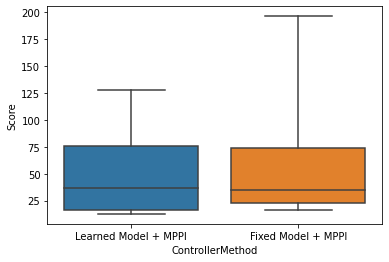

In [60]:
ax = sns.boxplot(x='ControllerMethod', y='Score', data=df[df['ControllerMethod']!='random_action'], whis=3.0)
# ax = sns.boxplot(x='ControllerMethod', y='new_scores', data=df)
ax.set_xticklabels(['Learned Model + MPPI', 'Fixed Model + MPPI'])

In [54]:
model_names = np.unique(df.ControllerMethod)

results = []

for model_name in model_names:
    model = df[df.ControllerMethod == model_name]
    scores = model['new_scores'].values
#     scores = scores[np.where(scores<150)]
    mu = np.mean(scores)
    std = np.std(scores)
    max_score = np.max(scores)
    min_score = np.min(scores)
#     print('MU:', mu)
#     print('STD:', std)
    results.append([model_name, mu, std, max_score, min_score])
    
new_results_df = pd.DataFrame(results, columns=['ModelName', 'mu', 'std', 'max_score', 'min_score'])
new_results_df

,ModelName,mu,std,max_score,min_score
0,bubble_dynamics_fixed_model_mppi,72.511084,69.667614,230.854043,16.622580
1,bubble_dynamics_pretrained_autoencoder_model_mppi,55.038451,46.898456,145.608569,12.665338
2,random_action,175.573094,46.775164,238.810032,91.189445


In [57]:
results_df

,ModelName,mu,std,max_score,min_score
0,bubble_dynamics_fixed_model_mppi,68.173792,61.827212,196.082074,16.622580
1,bubble_dynamics_pretrained_autoencoder_model_mppi,52.013342,42.841856,127.498426,12.665338
2,random_action,157.585878,33.656675,208.987375,91.189445


In [76]:
df

,FileCode,SceneName,ControllerMethod,Score,NumSteps,NumStepsExpected,new_scores,masked_score_scores
0,1,drawing_eval,bubble_dynamics_pretrained_autoencoder_model_mppi,14.372837,40,40,14.372837,61.0
1,3,drawing_eval,bubble_dynamics_pretrained_autoencoder_model_mppi,17.519509,40,40,17.519509,24.0
2,4,drawing_eval,bubble_dynamics_pretrained_autoencoder_model_mppi,54.709369,2,40,62.411154,22.0
3,5,drawing_eval,bubble_dynamics_pretrained_autoencoder_model_mppi,127.498426,2,40,133.414674,3.0
4,6,drawing_eval,bubble_dynamics_pretrained_autoencoder_model_mppi,37.048882,2,40,37.048882,8.0
5,7,drawing_eval,bubble_dynamics_pretrained_autoencoder_model_mppi,12.967795,40,40,12.967795,26.0
6,8,drawing_eval,bubble_dynamics_pretrained_autoencoder_model_mppi,124.141939,2,40,145.608569,0.0
7,9,drawing_eval,bubble_dynamics_pretrained_autoencoder_model_mppi,17.194833,2,40,17.194833,30.0
8,10,drawing_eval,bubble_dynamics_pretrained_autoencoder_model_mppi,50.230532,2,40,50.230532,17.0
9,11,drawing_eval,bubble_dynamics_pretrained_autoencoder_model_mppi,95.998834,2,40,106.290813,84.0


[Text(0, 0, 'Learned Model + MPPI'),
 Text(1, 0, 'Random Actions'),
 Text(2, 0, 'Fixed Model + MPPI')]

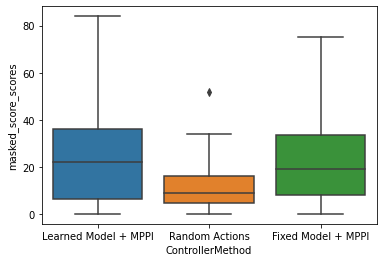

In [77]:
ax = sns.boxplot(x='ControllerMethod', y='masked_score_scores', data=df, whis=3.0)
# ax = sns.boxplot(x='ControllerMethod', y='new_scores', data=df)
ax.set_xticklabels(['Learned Model + MPPI', 'Random Actions', 'Fixed Model + MPPI'])  

in the case above, the higher, the better

In [13]:
def compute_line_mask(actual_drawing, desired_drawing):
    actual_drawing_line = np.sum(actual_drawing, axis=1)
    desired_drawing_line = np.sum(desired_drawing, axis=1)
    actual_drawing_norm = np.divide(actual_drawing_line.astype(np.float32), actual_drawing_line.astype(np.float32), out=np.zeros_like(actual_drawing_line, dtype=np.float32), where=actual_drawing_line!=0)
    desired_drawing_norm = np.divide(desired_drawing_line.astype(np.float32), desired_drawing_line.astype(np.float32), out=np.zeros_like(desired_drawing_line, dtype=np.float32), where=desired_drawing_line!=0)
    score = np.sum(desired_drawing_norm * actual_drawing_norm)/np.sum(desired_drawing_norm)
    return score

In [99]:
add_new_cost_function(compute_line_mask, 'line_masked')

[Text(0, 0, 'Learned Model + MPPI'),
 Text(1, 0, 'Random Actions'),
 Text(2, 0, 'Fixed Model + MPPI')]

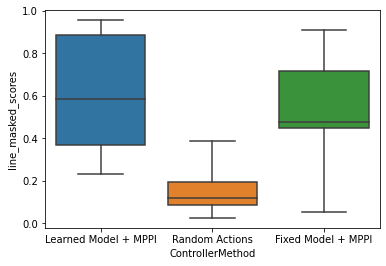

In [100]:
ax = sns.boxplot(x='ControllerMethod', y='line_masked_scores', data=df, whis=5)
# ax = sns.boxplot(x='ControllerMethod', y='new_scores', data=df)
ax.set_xticklabels(['Learned Model + MPPI', 'Random Actions', 'Fixed Model + MPPI'])

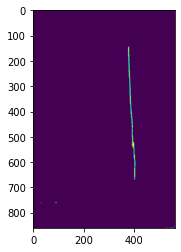

In [87]:
plt.imshow(load_drawing(1))

In [90]:
df['line_masked_scores']

0     524.0
1     275.0
2     193.0
3     167.0
4     211.0
5     526.0
6     129.0
7     498.0
8     321.0
9     212.0
10    134.0
11    407.0
12    323.0
13    480.0
14    504.0
15     58.0
16     45.0
17    212.0
18     49.0
19     88.0
20     83.0
21    210.0
22     65.0
23    113.0
24     41.0
25    150.0
26    101.0
27     47.0
28     46.0
29     14.0
30    262.0
31    362.0
32    259.0
33    428.0
34    234.0
35    499.0
36     78.0
37    493.0
38    491.0
39    259.0
40    349.0
41     28.0
42    296.0
43    261.0
44     98.0
Name: line_masked_scores, dtype: float64

[(0.0, 1.0)]

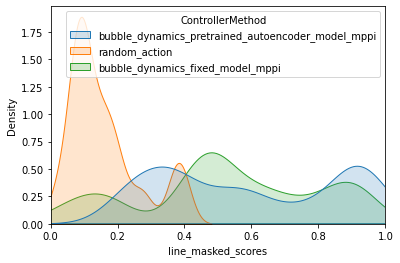

In [106]:
ax = sns.kdeplot(data=df, x='line_masked_scores', hue='ControllerMethod', fill=True, alpha=.2, bw_adjust=.5)
ax.set(xlim=(0,1))

In [97]:
np.sum(load_desired_drawing(1)>0)

551

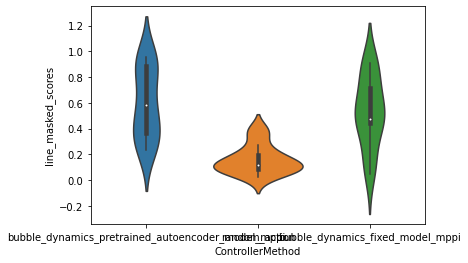

In [108]:
ax = sns.violinplot(data=df, y='line_masked_scores', x='ControllerMethod')